**Linear Regression With Time Series**

In [11]:
import pandas as pd
df = pd.read_csv('../../../data/book_sales.csv')

In [12]:
df.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [13]:
df.index

RangeIndex(start=0, stop=30, step=1)

In [14]:
import numpy as np
df['Time'] = np.arange(len(df.index))
df.head()

,Date,Paperback,Hardcover,Time
0,2000-04-01,199,139,0
1,2000-04-02,172,128,1
2,2000-04-03,111,172,2
3,2000-04-04,209,139,3
4,2000-04-05,161,191,4


Text(0.5, 1.0, 'Time Plot of Hardcover Sales')

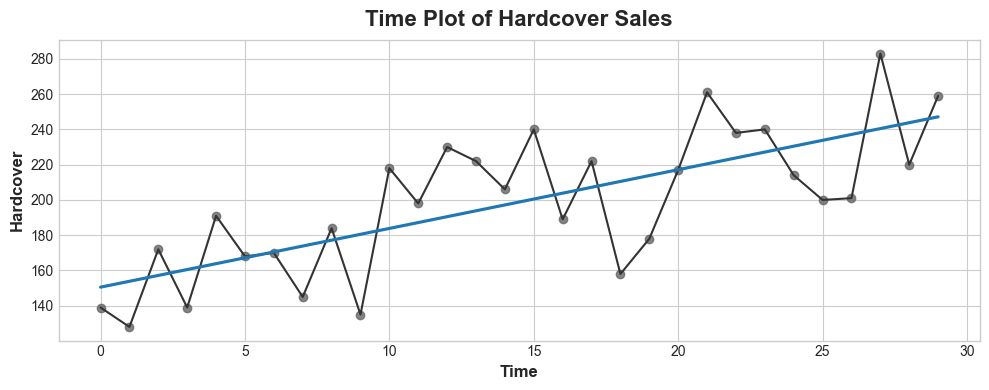

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('figure', autolayout=True, figsize=(10,4), titlesize=18, titleweight='bold')
plt.rc('axes', labelweight='bold', labelsize='large', titlesize=16, titleweight='bold', titlepad=10)
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.20')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.40'))
ax.set_title('Time Plot of Hardcover Sales')

In [16]:
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns=['Hardcover', 'Lag_1'])
df.head()

,Hardcover,Lag_1
0,139,NaN
1,128,139.0
2,172,128.0
3,139,172.0
4,191,139.0


Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

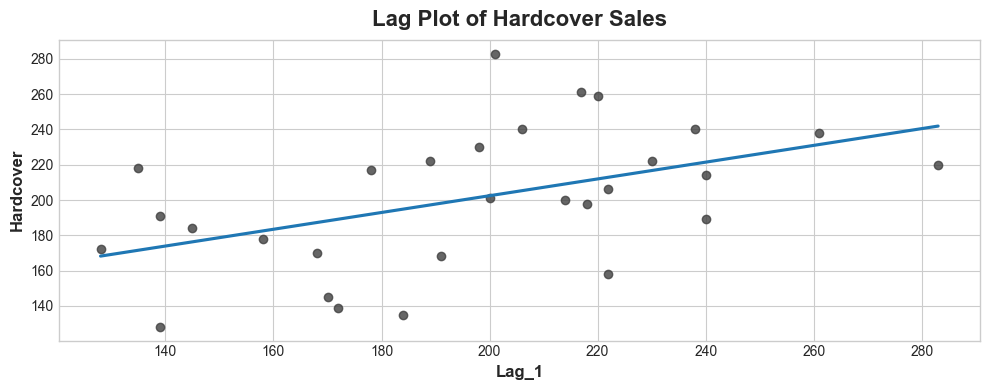

In [17]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Lag Plot of Hardcover Sales')

In [18]:
tunnel = pd.read_csv('../../../data/tunnel.csv')
tunnel = tunnel.set_index('Day')
tunnel.head()
type(tunnel.index)

pandas.core.indexes.base.Index

In [19]:
df = tunnel.copy()
df['Time'] = np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


In [20]:
from sklearn.linear_model import LinearRegression
X = df.loc[:, ['Time']]
y = df.loc[:, 'NumVehicles']
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

Text(0.5, 1.0, 'Time Plot of Tunnel Traffic')

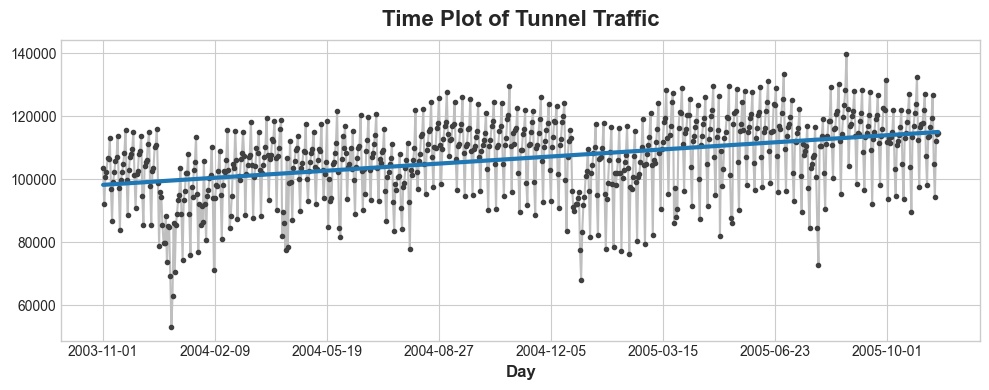

In [21]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic')